In [2]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import json

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import re

from selenium import webdriver

from time    import sleep , time
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비
# import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV
from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.metrics         import accuracy_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler
from   sklearn.impute          import SimpleImputer
sklearn.__version__

'0.24.2'

In [3]:
params = {
    'criterion' : ['gini', 'entropy'],
    'splitter'  : ['best', 'random'],
    'max_depth' : [1, 2, 3],
    'min_samples_split' : [2, 3]
}
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size= 0.2,
                                                    shuffle=True,
                                                    random_state=200)
dt_model = DecisionTreeClassifier()
grid_tree_model = GridSearchCV(dt_model, param_grid = params, cv =3, refit = True)
grid_tree_model.fit(X_train,y_train)
grid_tree_model.cv_results_

{'mean_fit_time': array([0.0065403 , 0.00141978, 0.00109903, 0.00145928, 0.00132354,
        0.00216333, 0.00130002, 0.00084527, 0.00072376, 0.00095908,
        0.00205938, 0.00131361, 0.00188605, 0.00142678, 0.00249426,
        0.00244697, 0.00224201, 0.00191379, 0.00226116, 0.00077931,
        0.00135144, 0.00083598, 0.00088143, 0.00079799]),
 'std_fit_time': array([7.71506530e-03, 2.83558651e-04, 5.86407393e-05, 4.60824335e-04,
        3.09488765e-04, 8.03044513e-04, 5.35262023e-04, 2.07256046e-04,
        3.73977019e-05, 3.69961382e-04, 7.51543022e-04, 3.33435541e-04,
        8.82271087e-04, 4.77259621e-04, 1.02339112e-03, 6.56712174e-04,
        1.14067615e-03, 3.37477604e-04, 2.20016231e-03, 1.41623356e-04,
        5.64751711e-04, 1.49993438e-04, 2.14875949e-04, 1.45599007e-04]),
 'mean_score_time': array([0.00072575, 0.00074792, 0.0009319 , 0.00164596, 0.00078456,
        0.00079266, 0.00103728, 0.00041072, 0.00052794, 0.00048772,
        0.00137631, 0.00115188, 0.00139117, 0.00

In [4]:
print('최적의 파라미터 - ', grid_tree_model.best_params_)
print('최고 점수 - ', grid_tree_model.best_score_)

최적의 파라미터 -  {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'random'}
최고 점수 -  0.9583333333333334


In [5]:
estimator = grid_tree_model.best_estimator_
estimator

y_pred = estimator.predict(X_test)

print('GridSearchCV 테스트 정확도 - ' , accuracy_score(y_test , y_pred))

print('answer - ' , y_test)

print('prediction - ' , y_pred)


GridSearchCV 테스트 정확도 -  0.8333333333333334
answer -  [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]
prediction -  [1 2 0 0 1 2 1 1 1 2 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 2 1 1]


In [6]:
print('피처의 중요도를 시각화 - ')
print('트리 분류 형성에 각 피처가 얼마나 잘 작용했는지를 평가하는 지표')
print('해당 지표는 0 ~ 1 사이의 값을 가지며 , 0이면 특성이 전혀 고려되지 않을 것 - ')
print('특성의 중요도의 합은 1 이다')


print('feature importance - ' , estimator.feature_importances_)


피처의 중요도를 시각화 - 
트리 분류 형성에 각 피처가 얼마나 잘 작용했는지를 평가하는 지표
해당 지표는 0 ~ 1 사이의 값을 가지며 , 0이면 특성이 전혀 고려되지 않을 것 - 
특성의 중요도의 합은 1 이다
feature importance -  [0. 0. 1. 0.]


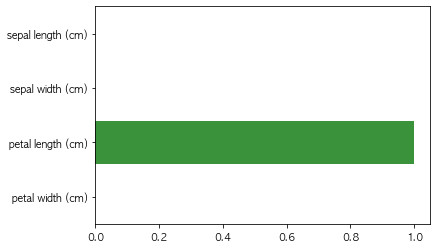

****************************************************************************************************
sepal length (cm) 	 0.0
sepal width (cm) 	 0.0
petal length (cm) 	 1.0
petal width (cm) 	 0.0


In [7]:
sns.barplot(x= estimator.feature_importances_, y = iris.feature_names)

plt.show()
plt.close()

print('*'*100)
for name, value in zip(iris.feature_names, estimator.feature_importances_):
    print(name, '\t', value)

In [8]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
cancer_frm = pd.DataFrame(data = cancer.data,
                         columns = cancer.feature_names,
                         )
cancer_frm['target'] = cancer.target

In [10]:
cancer_frm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [11]:
print('DecisionTree Estimator - ')
print('train , test : 7 , 3')
print('학습 - 예측 fit , predict')
print('모델 정확도 평가 - accuracy_score')
print()

DecisionTree Estimator - 
train , test : 7 , 3
학습 - 예측 fit , predict
모델 정확도 평가 - accuracy_score



In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.3,
                                                    shuffle= True,
                                                    random_state=200)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [13]:
cancer_model = DecisionTreeClassifier()
cancer_model.fit(X_train, y_train)
y_pred = cancer_model.predict(X_test)
print('*'*100)
print('answer - ', y_test)
print('pred - ', y_pred)

****************************************************************************************************
answer -  [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0]
pred -  [1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0]


In [14]:
print('예측 정확도 - ', accuracy_score(y_test, y_pred))

예측 정확도 -  0.9181286549707602


In [15]:
print('graphvis 트리 시각화 - ')
params = {
    'criterion' : ['gini' , 'entropy'] ,
    'splitter'  : ['best' , 'random']  ,
    'max_depth' : [1 , 2 , 3 ] ,
    'min_samples_split' : [2 , 3]
}
# refit -> 가장 좋은 파라미터 설정으로 재학습 시킴
grid_tree_model = GridSearchCV(cancer_model , param_grid = params , cv = 3 , refit = True)
grid_tree_model.fit(X_train , y_train)
grid_tree_model.cv_results_


graphvis 트리 시각화 - 


{'mean_fit_time': array([0.00458487, 0.00087833, 0.00231608, 0.00150156, 0.00477616,
        0.00334104, 0.00354067, 0.00150498, 0.00418742, 0.00131202,
        0.00439962, 0.00306551, 0.00350467, 0.00121633, 0.00310127,
        0.00138958, 0.00592057, 0.00196775, 0.00411201, 0.0014418 ,
        0.00545311, 0.00276995, 0.00662891, 0.00190425]),
 'std_fit_time': array([2.16605781e-03, 1.21532843e-04, 1.28988099e-04, 2.07732600e-04,
        7.75681265e-04, 9.41122551e-04, 5.31140708e-04, 1.40885993e-04,
        9.00813468e-04, 4.20577402e-05, 6.92046368e-04, 2.06873831e-03,
        1.17169213e-03, 2.36329169e-04, 1.79165847e-04, 3.33036668e-04,
        8.86697839e-04, 6.61668341e-04, 6.96199098e-04, 2.25612545e-04,
        1.33890886e-03, 6.58012242e-05, 8.34627915e-04, 7.72228098e-04]),
 'mean_score_time': array([0.00119448, 0.0005842 , 0.00144275, 0.00087269, 0.00094446,
        0.00076636, 0.00090361, 0.0009408 , 0.00071764, 0.00080196,
        0.00076214, 0.00087309, 0.00092864, 0.00

GridSearchCV 테스트 정확도 -  0.9239766081871345

answer -  [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0]

pred   -  [1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0]
feature importance -  [0.16065423 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03311663 0.
 0.         0.         0.12082051 0.    

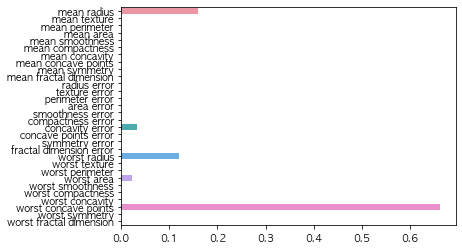


mean radius 	 0.16065423047687136
mean texture 	 0.0
mean perimeter 	 0.0
mean area 	 0.0
mean smoothness 	 0.0
mean compactness 	 0.0
mean concavity 	 0.0
mean concave points 	 0.0
mean symmetry 	 0.0
mean fractal dimension 	 0.0
radius error 	 0.0
texture error 	 0.0
perimeter error 	 0.0
area error 	 0.0
smoothness error 	 0.0
compactness error 	 0.0
concavity error 	 0.0331166325108097
concave points error 	 0.0
symmetry error 	 0.0
fractal dimension error 	 0.0
worst radius 	 0.12082050769059688
worst texture 	 0.0
worst perimeter 	 0.0
worst area 	 0.02378947984818328
worst smoothness 	 0.0
worst compactness 	 0.0
worst concavity 	 0.0
worst concave points 	 0.6616191494735387
worst symmetry 	 0.0
worst fractal dimension 	 0.0


In [19]:
estimator = grid_tree_model.best_estimator_
estimator

y_pred = estimator.predict(X_test)

print('GridSearchCV 테스트 정확도 - ' , accuracy_score(y_test , y_pred))

print()

print('answer - ' , y_test)
print()
print('pred   - ' , y_pred)


print('feature importance - ' , estimator.feature_importances_)
print()
sns.barplot(x = estimator.feature_importances_ , y = cancer.feature_names)

plt.show()
plt.close()

print()
for name, value in zip(cancer.feature_names , estimator.feature_importances_) :
    print(name , '\t' , value)

In [16]:
print('피처의 중요도를 시각화 - ')
print('트리 분류 형성에 각 피처가 얼마나 잘 작용했는지를 평가하는 지표')
print('해당 지표는 0 ~ 1 사이의 값을 가지며 , 0이면 특성이 전혀 고려되지 않을 것 - ')
print('특성의 중요도의 합은 1 이다')
print()

피처의 중요도를 시각화 - 
트리 분류 형성에 각 피처가 얼마나 잘 작용했는지를 평가하는 지표
해당 지표는 0 ~ 1 사이의 값을 가지며 , 0이면 특성이 전혀 고려되지 않을 것 - 
특성의 중요도의 합은 1 이다



In [19]:
'''
#### 데이터 전처리
- 데이터 인코딩(ml 문자열값을 입력값으로 허용하지 않는다) -> 숫자형 변환
- 레이블 인코딩 , 원-핫-인코딩
- 주의사항) 회귀 X , 트리계열의 알고리즘에서는 적용(성능이 떨어지는 단점, 왜냐하면 숫자의 특성이 반영되기 때문에)

- 입력값은 결측값을 허용하지 않는다 -> 고정된 다른값으로 변환
- 이상치

- 피처 스케일링 : 정규화(0과 1 사이의 값으로 변환) , 표준화(정규분포를 따르는 형식 평균 0 분산 1 가우시안 분포)
- 정규화 : MinMaxScalar
- 표준화 : StandardScalar
'''


In [20]:
label_items = ['낫또' , '집밥' , 'ABC 쥬스' , '육계장 칼국수' , '낫또']
encoder = LabelEncoder()
label_digit = encoder.fit(label_items).transform(label_items)
print('digit - ' , label_digit)
print('label - ' , encoder.classes_)
print('label - ' , encoder.inverse_transform([1, 3, 0, 2, 1]))

digit -  [1 3 0 2 1]
label -  ['ABC 쥬스' '낫또' '육계장 칼국수' '집밥']
label -  ['낫또' '집밥' 'ABC 쥬스' '육계장 칼국수' '낫또']


In [21]:
label_items = ['낫또' , '집밥' , 'ABC 쥬스' , '육계장 칼국수' , '낫또']
encoder = LabelEncoder()
label_digit = encoder.fit(label_items).transform(label_items)

print('digit - ' , label_digit)
print('type - ' , type(label_digit))

digit -  [1 3 0 2 1]
type -  <class 'numpy.ndarray'>


In [22]:
print('2차원 데이터 변환 - ')
reshape_label_digit = label_digit.reshape(-1, 1)
print(reshape_label_digit.shape)
print(reshape_label_digit)

2차원 데이터 변환 - 
(5, 1)
[[1]
 [3]
 [0]
 [2]
 [1]]


In [23]:
print('item -> digit -> one-hot encoding')
one_hot_encoder = OneHotEncoder()
one_hot_encoder_label = one_hot_encoder.fit(reshape_label_digit).transform(reshape_label_digit)
print('shape - ' , one_hot_encoder_label.shape)
print(one_hot_encoder_label.toarray() )

item -> digit -> one-hot encoding
shape -  (5, 4)
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [24]:
encoder_frm = pd.DataFrame({
    'label_items' : ['낫또' , '집밥' , 'ABC 쥬스' , '육계장 칼국수' , '낫또']
})
pd.get_dummies(encoder_frm)

,label_items_ABC 쥬스,label_items_낫또,label_items_육계장 칼국수,label_items_집밥
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


In [25]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

In [26]:
df = pd.read_csv(csv_data)
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


<AxesSubplot:>

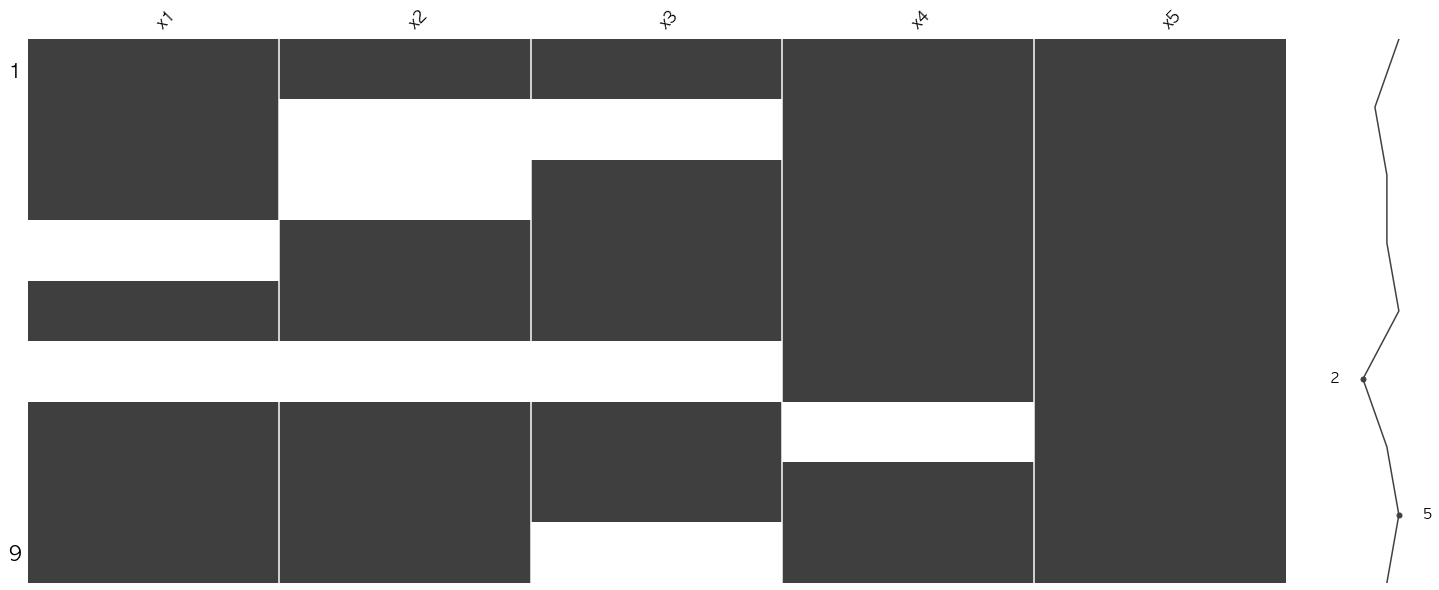

In [27]:
msno.matrix(df)

<AxesSubplot:>

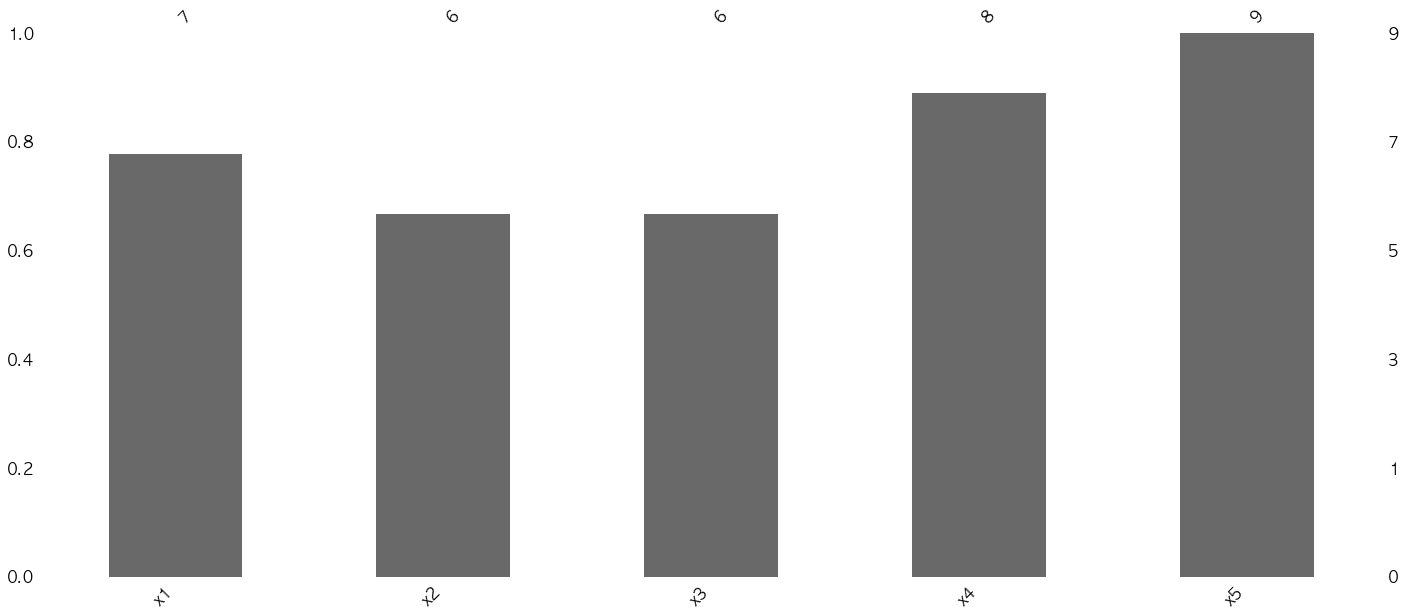

In [28]:
msno.bar(df)

In [45]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:>

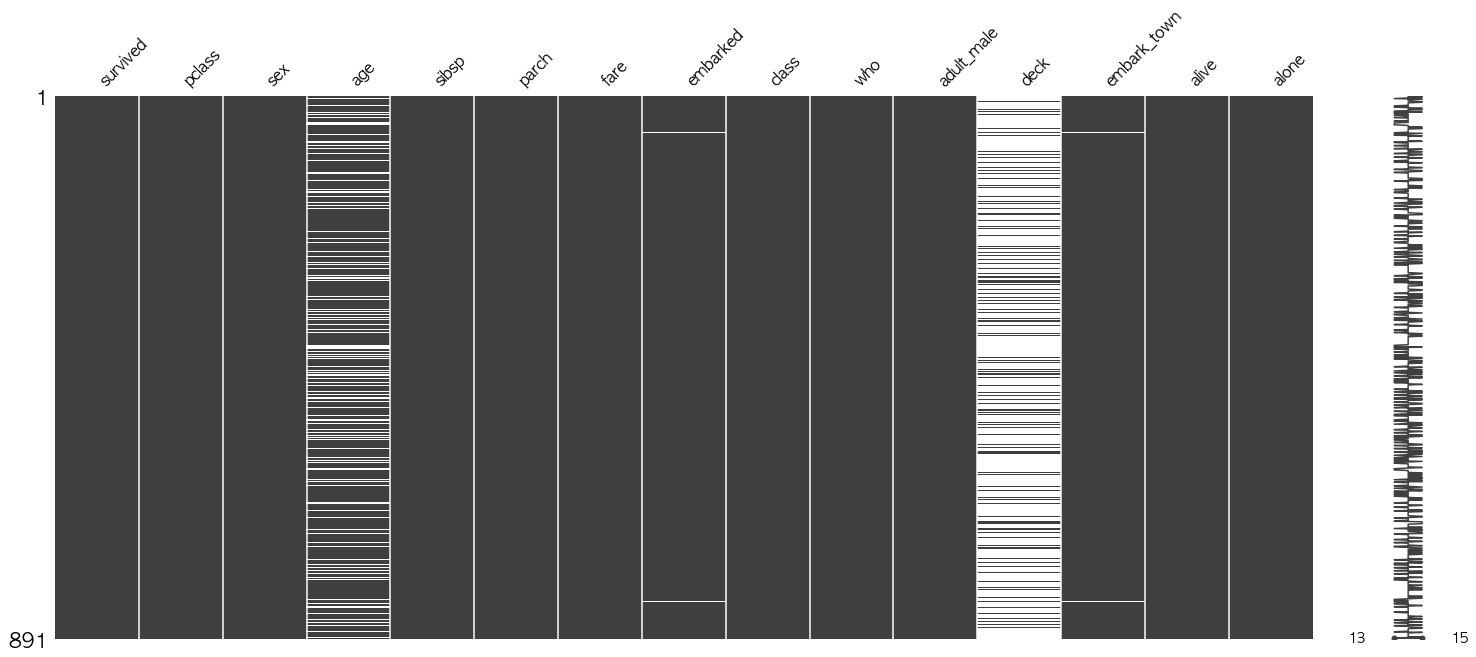

In [46]:
msno.matrix(titanic)

In [31]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [32]:
titanic['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [34]:
print('age - 평균 대체한다면? SimpleImputer')
# strategy = mean , median , most_frequent

titanic_age_imputer = SimpleImputer(strategy= 'most_frequent')
titanic['deck'] = titanic_age_imputer.fit_transform(titanic[['deck']])

age - 평균 대체한다면? SimpleImputer


In [35]:
titanic['deck'].value_counts()

C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

<AxesSubplot:>

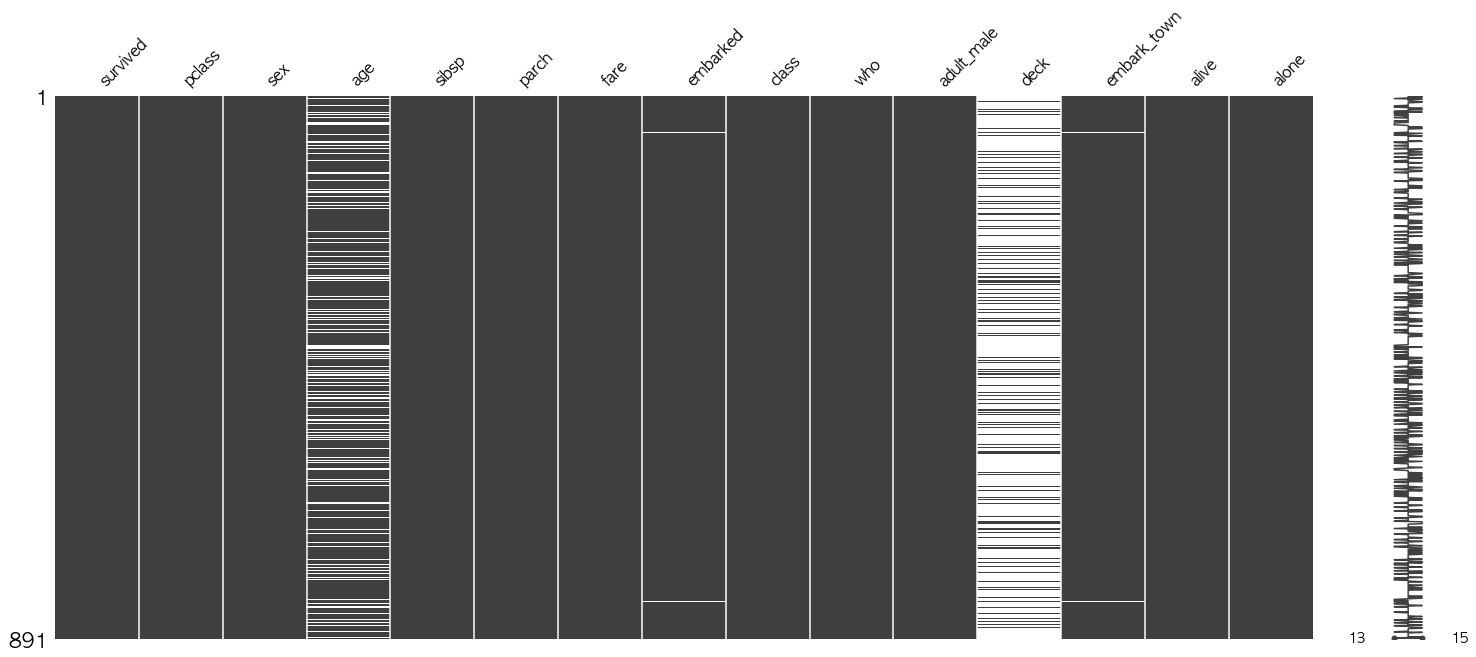

In [47]:
msno.matrix(titanic)

In [49]:
titanic_age_imputer = SimpleImputer(strategy='mean')
titanic['age'] = titanic_age_imputer.fit_transform(titanic[['age']])

<AxesSubplot:>

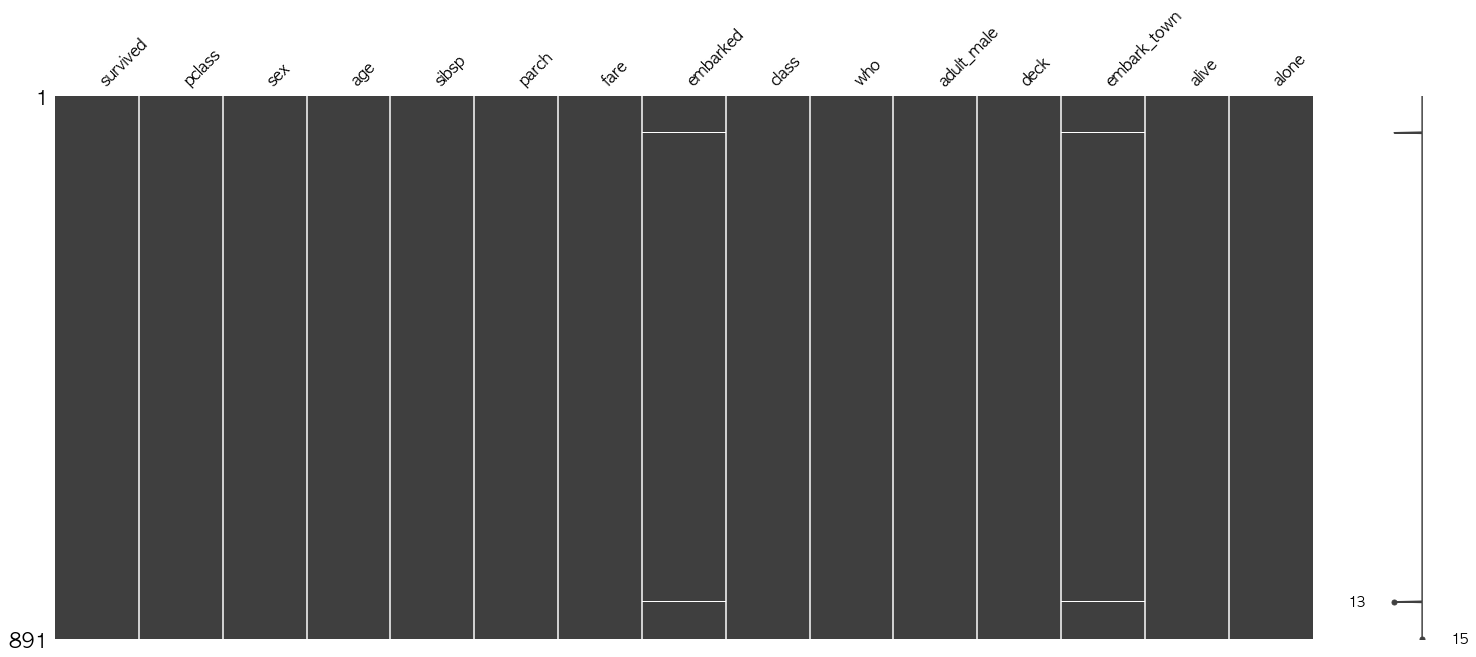

In [50]:
msno.matrix(titanic)

<AxesSubplot:>

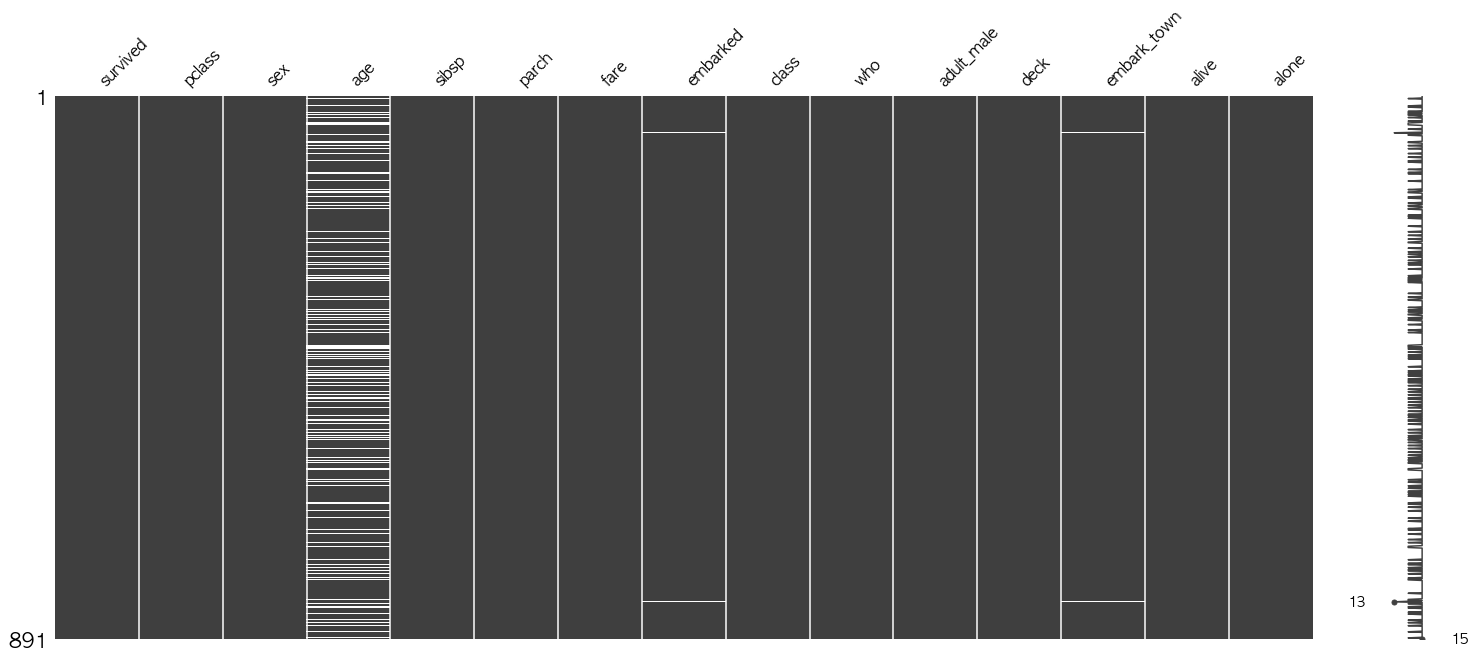

In [48]:
print('deck의 값을 G로 대체하는 방법')
titanic['deck'] = titanic['deck'].fillna('G')
msno.matrix(titanic)

In [52]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

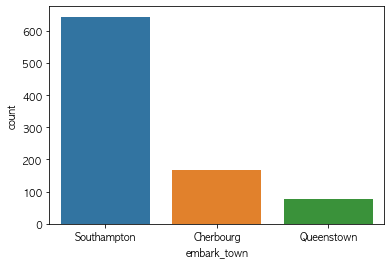

In [53]:
sns.countplot(titanic.embark_town)

plt.show()
plt.close()

In [55]:
print('embark_town , embarked - 최빈값으로 대체한다면? SimpleImputer')
titanic_embark_imputer = SimpleImputer(strategy='most_frequent')
titanic['embark_town'] = titanic_embark_imputer.fit_transform(titanic[['embark_town']])
titanic['embarked'] = titanic_embark_imputer.fit_transform(titanic[['embarked']])

embark_town , embarked - 최빈값으로 대체한다면? SimpleImputer


데이터의 분포를 확인할때- 


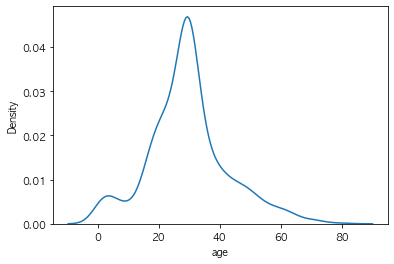

In [56]:
print('데이터의 분포를 확인할때- ')
sns.kdeplot(titanic.age)

plt.show()
plt.close()

In [57]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [65]:
print('Featuer Scaling')
print('정규화 (x - x최소값) / (x최대값 - x최소값) -> MinMaxScaler')
print('표준화 (x - x평균값) / (x표준편차) -> StandardScaler')

Featuer Scaling
정규화 (x - x최소값) / (x최대값 - x최소값) -> MinMaxScaler
표준화 (x - x평균값) / (x표준편차) -> StandardScaler


In [70]:
iris_frm = pd.DataFrame(data = iris.data,
                        columns = iris.feature_names)
iris_frm

print('mean -', iris_frm.mean())
print('*'*50)
print('std -', iris_frm.std())
print('*'*50)
print('var -', iris_frm.var())

mean - sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
**************************************************
std - sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64
**************************************************
var - sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [71]:
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [73]:
s_scalar = StandardScaler()
s_iris = s_scalar.fit_transform(iris_frm)
s_iris

standard_iris_frm = pd.DataFrame(data = s_iris,
                                 columns= iris.feature_names)
standard_iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [74]:
m_scalar = MinMaxScaler()
m_iris = m_scalar.fit_transform(iris_frm)
m_iris

minmax_iris_frm = pd.DataFrame(data = m_iris,
                               columns = iris.feature_names)
minmax_iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [77]:
tmp_frm = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv' ,
                      header = None ,
                      usecols = [0, 2, 13])
tmp_frm.columns = ['target' , 'x' , 'y']

In [78]:
tmp_frm

,target,x,y
0,1,1.71,1065
1,1,1.78,1050
2,1,2.36,1185
3,1,1.95,1480
4,1,2.59,735
...,...,...,...
173,3,5.65,740
174,3,3.91,750
175,3,4.28,835
176,3,2.59,840


In [79]:
X_train, X_test, y_train, y_test = train_test_split(tmp_frm[['x','y']],
                                                    tmp_frm['target'],
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=200
                                                    )
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((142, 2), (36, 2), (142,), (36,))

In [81]:
tmp_model = DecisionTreeClassifier()
tmp_model.fit(X_train, y_train)
y_pred = tmp_model.predict(X_test)

print('모델 성능평가 - ', accuracy_score(y_test,y_pred))


모델 성능평가 -  0.6944444444444444
